# Analysis changelog

## Let's explore the data set to see if we can answer some interesting questions:


+ How the average salary has change over the years?
+ What Sport appears more often in the top 10?
+ What players appears more often in the top 10?
+ What country has the most top 1 players?
+ What country has the average better salary?

### First let's import the mean libraries that we going to be using 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the cleaned dataset

In [4]:
df = pd.read_csv("C:/Users/ewill/OneDrive/Desktop/Projects/Richest_project_1/richest_cleaned_data.csv", index_col=[0])

In [5]:
df.head()

,Name,Nationality,CurrentRank,Sport,Year,earnings
Index,,,,,,
1,Mike Tyson,USA,1,boxing,1990,28.6
2,Buster Douglas,USA,2,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,car racing,1990,10.0
5,Alain Prost,France,5,car racing,1990,9.0


## How the average salary has change over the years?

In [11]:
df.groupby("Year").mean()["earnings"]

Year
1990     12.800000
1991     18.350000
1992     15.870000
1993     17.830000
1994     14.890000
1995     22.910000
1996     27.310000
1997     33.810000
1998     28.140000
1999     35.750000
2000     33.850000
2002     32.363636
2003     37.500000
2004     40.740000
2005     40.620000
2006     43.100000
2007     42.100000
2008     48.300000
2009     47.600000
2010     51.370000
2011     44.880000
2012     54.310000
2013     55.250000
2014     64.240000
2015     95.030000
2016     63.520000
2017     62.370000
2018    105.940000
2019     94.140000
2020     81.920000
Name: earnings, dtype: float64

Text(0, 0.5, 'Earnings')

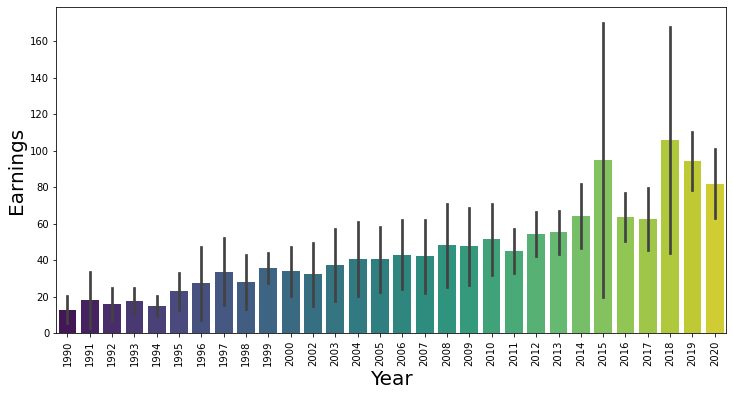

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Year', y='earnings', estimator=np.mean, ci="sd", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Year", size=20)
plt.ylabel("Earnings", size=20)

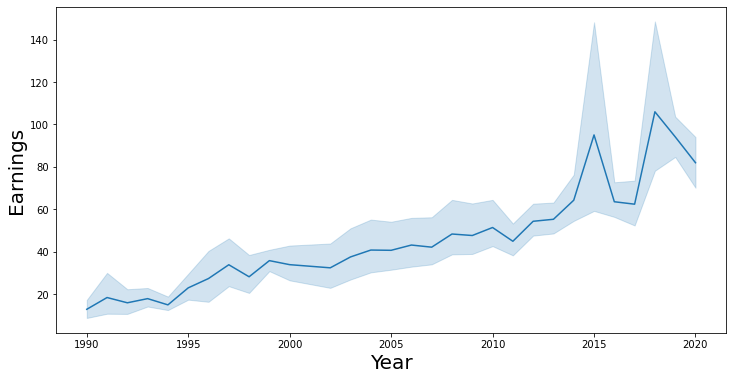

In [127]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Year", y="earnings")
plt.xlabel("Year", size=20)
plt.ylabel("Earnings", size=20);

### We can easily indentify the increase tendency on the players earnings but something weird happened in 2015 and 2018 let's take a look

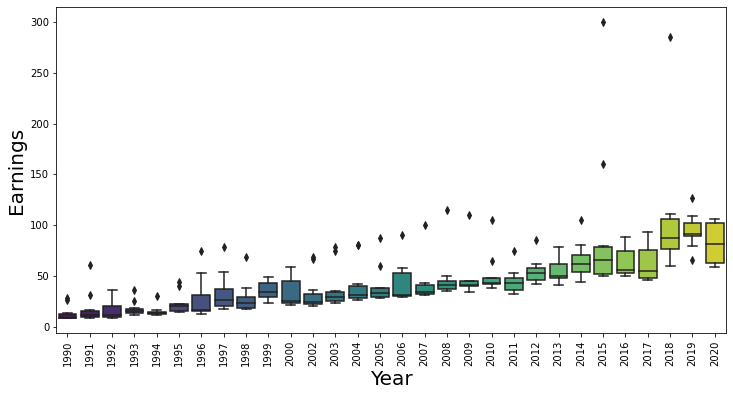

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Year", y="earnings", palette="viridis")
plt.xlabel("Year", size=20)
plt.ylabel("Earnings", size=20)
plt.xticks(rotation=90);

### Clearly some severe outliers let's see those two biggest outliers from 2015 and 2018

In [40]:
df[df["earnings"]>250]

,Name,Nationality,CurrentRank,Sport,Year,earnings
Index,,,,,,
242,Floyd Mayweather,USA,1,boxing,2015,300.0
272,Floyd Mayweather,USA,1,boxing,2018,285.0


### It looks like Floyd Mayweather made a lot of money on those years which is creating a distorsion on the average but we can still se the tendency so let leave this here just out of curiosity

## What Sport Shows up more often in the top 10?

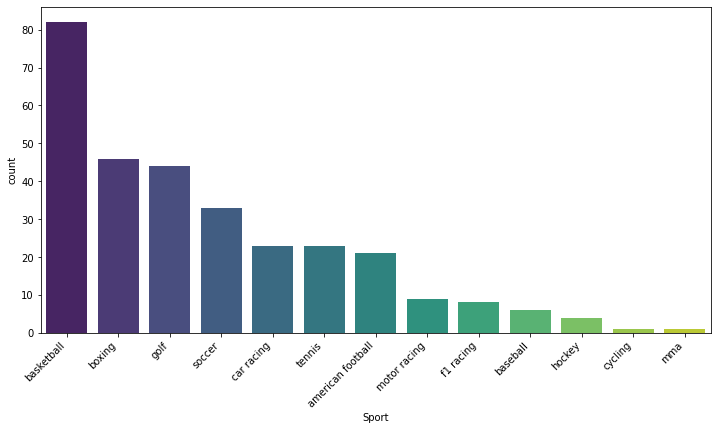

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Sport", order=df['Sport'].value_counts().index, palette="viridis")
plt.xticks(rotation=45, ha="right");

### Clearly basketaball is winning by far

## What players appears more often in the top 10?

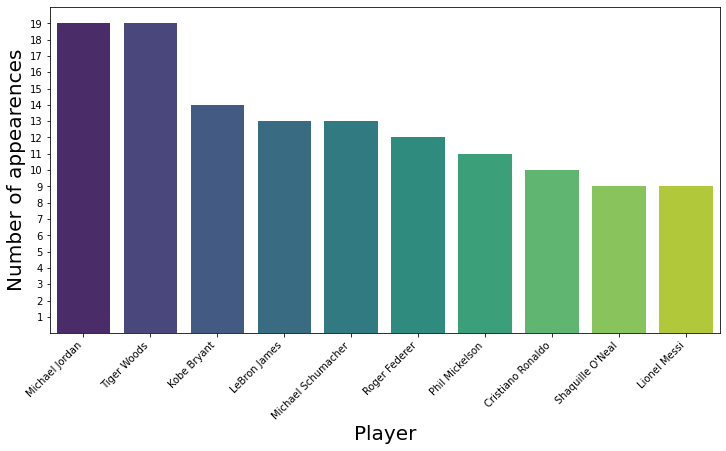

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Name", order= df["Name"].value_counts().iloc[:10].index, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.yticks(ticks=np.arange(1,20))
plt.xlabel("Player", size=20)
plt.ylabel("Number of appearences", size=20)
plt.ylim(0,20);

### It makes sence since basketball is the sport that most appear in top 10 throughout those years here we see  4 baskball players on the top 10 players that appear more often on top 10

## What country has the most top 1 players?

In [109]:
n1 = df[df["CurrentRank"] == 1]  

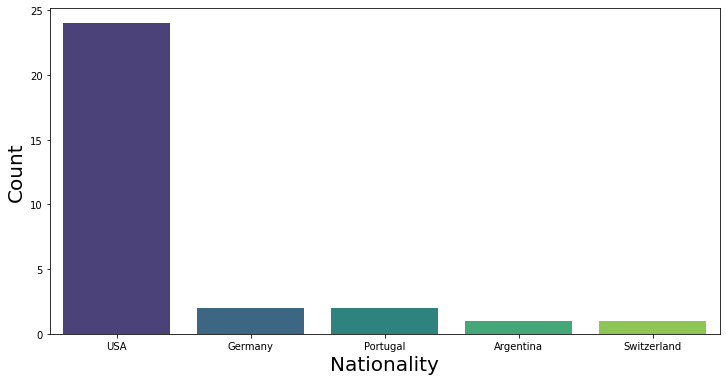

In [114]:
plt.figure(figsize=(12,6))
sns.countplot(data=n1, x="Nationality", order=n1["Nationality"].value_counts().index, palette="viridis")
plt.xlabel("Nationality", size=20)
plt.ylabel("Count", size=20);

### A dominance of american players on Top1 

## What country has the average better salary?

Text(0, 0.5, 'Earnings')

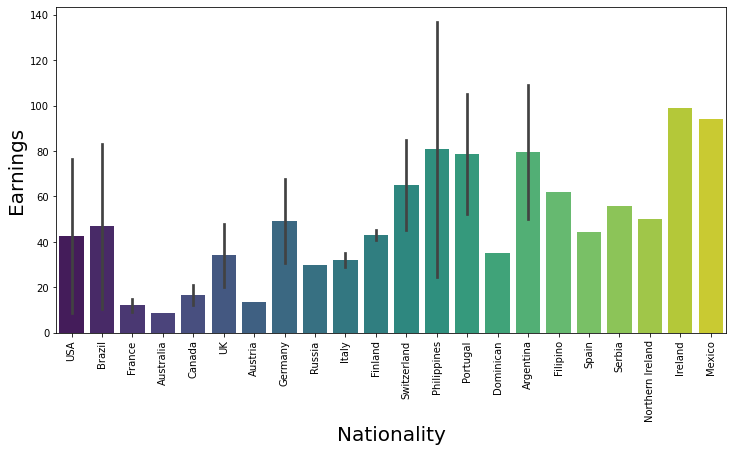

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Nationality', y='earnings', estimator=np.mean, ci="sd", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Nationality", size=20)
plt.ylabel("Earnings", size=20)

### It's looks like players among all the countries use to appear on top 10 and US is not the top 1.  It looks like Ireland is the one let's see how many players is counting for that 

In [132]:
df[df["Nationality"] == 'Ireland']

,Name,Nationality,CurrentRank,Sport,Year,earnings
Index,,,,,,
275,Conor McGregor,Ireland,4,mma,2018,99.0


### It's looks McGregor in holding Ireland just by himself, for that this last grafic don't give to much information because way more many players is counting for the average of US for a long period of time 

In [138]:
df[df["Sport"] == 'soccer'][:1]

,Name,Nationality,CurrentRank,Sport,Year,earnings
Index,,,,,,
139,David Beckham,UK,8,soccer,2004,28.0


### Tha latest observation is that since 1990 a first appearence of a soccer player among the top 10 was only in 2004 with David Beckham. Despite this fact soccer apper on fourth among the sports that appears more often on top 10 and count with 2 players that most appears on top 10. Definitely soccer has been growing a lot this decade.